In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# Data Loading n Preprocessing

In [2]:
dfx = pd.read_csv("Train (house price)/Train_Data.csv")

In [3]:
dfx.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 81 columns):
Id               1100 non-null int64
MSSubClass       1100 non-null int64
MSZoning         1100 non-null object
LotFrontage      908 non-null float64
LotArea          1100 non-null int64
Street           1100 non-null object
Alley            69 non-null object
LotShape         1100 non-null object
LandContour      1100 non-null object
Utilities        1100 non-null object
LotConfig        1100 non-null object
LandSlope        1100 non-null object
Neighborhood     1100 non-null object
Condition1       1100 non-null object
Condition2       1100 non-null object
BldgType         1100 non-null object
HouseStyle       1100 non-null object
OverallQual      1100 non-null int64
OverallCond      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null object
RoofMatl         1100 non-null object
Exterior1st      1100 non-nu

In [5]:
drop_columns = ["MiscFeature","PoolQC","Fence","FireplaceQu","Alley"]
x = dfx.drop(columns = drop_columns)


In [6]:
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
x.dropna(inplace = True)

In [8]:
x.head(n=10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000
10,11,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,129500


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
#x.apply(LabelEncoder().fit_transform)

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 1099
Data columns (total 76 columns):
Id               825 non-null int64
MSSubClass       825 non-null int64
MSZoning         825 non-null object
LotFrontage      825 non-null float64
LotArea          825 non-null int64
Street           825 non-null object
LotShape         825 non-null object
LandContour      825 non-null object
Utilities        825 non-null object
LotConfig        825 non-null object
LandSlope        825 non-null object
Neighborhood     825 non-null object
Condition1       825 non-null object
Condition2       825 non-null object
BldgType         825 non-null object
HouseStyle       825 non-null object
OverallQual      825 non-null int64
OverallCond      825 non-null int64
YearBuilt        825 non-null int64
YearRemodAdd     825 non-null int64
RoofStyle        825 non-null object
RoofMatl         825 non-null object
Exterior1st      825 non-null object
Exterior2nd      825 non-null object
MasVnrType  

In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
data = list(x.dtypes)
columns = x.columns

In [15]:
data = np.array(data)
columns = np.array(columns)
print(data.shape,columns.shape)

(76,) (76,)


In [16]:
x_train = np.array(x)

In [17]:
for i in range(76):
    if data[i] == 'O':
        le = LabelEncoder()
        x_train[:,i] = le.fit_transform(x_train[:,i])
    

In [18]:
x_train

array([[1, 60, 3, ..., 7, 4, 208500],
       [2, 20, 3, ..., 7, 4, 181500],
       [3, 60, 3, ..., 7, 4, 223500],
       ...,
       [1096, 20, 3, ..., 7, 4, 176432],
       [1099, 50, 4, ..., 7, 4, 128000],
       [1100, 20, 3, ..., 0, 0, 157000]], dtype=object)

In [19]:
y_train = x_train[:,-1]
x_train = x_train[:,:-1]

In [20]:
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)

In [21]:
for i in range(y_train.shape[0]):
    y_train[i] = float(y_train[i]/np.sum(y_train))

In [22]:
sum1 = np.sum(y_train)
print(sum1)

7.483699035814147


In [23]:
print(y_train)

[0.0013414320572769484 0.0011692899541734425 0.0014415550435210992
 0.0009042910846628318 0.0016162670842317492 0.0009260014378147759
 0.001989831687755129 0.0008436302660669541 0.0007669932588452353
 0.0008423887083247007 0.0022460936620888054 0.0018237577177368505
 0.0008628832382242305 0.00104027972233606 0.0009103739706488749
 0.0021324784222753125 0.0009157785529530758 0.0015123538993281704
 0.0008554449159794409 0.0016892859838262416 0.0008899768964969382
 0.0020220735625998843 0.0013739555733386108 0.00045419491965491634
 0.00026534382856549353 0.0011937006100612407 0.0010994639091357887
 0.0018455410984768283 0.0020588346167734746 0.0009681129885079606
 0.0010225160299513441 0.0007292047559961365 0.001071173407117391
 0.0011393421780968417 0.0009460616945235737 0.002148451972909613
 0.0016131997351432475 0.00168331419636839 0.0008575945940919101
 0.0007738493263450141 0.0007440117870595626 0.002605980134632364
 0.0008822404452202285 0.0012260385866847045 0.001173137237844332
 0

In [24]:
print(x_train.shape,y_train.shape)

(825, 75) (825,)


In [25]:
print(x_train)

[[0.00000000e+00 2.35294118e-01 7.50000000e-01 ... 5.00000000e-01
  1.00000000e+00 8.00000000e-01]
 [9.09918107e-04 0.00000000e+00 7.50000000e-01 ... 2.50000000e-01
  1.00000000e+00 8.00000000e-01]
 [1.81983621e-03 2.35294118e-01 7.50000000e-01 ... 5.00000000e-01
  1.00000000e+00 8.00000000e-01]
 ...
 [9.96360328e-01 0.00000000e+00 7.50000000e-01 ... 2.50000000e-01
  1.00000000e+00 8.00000000e-01]
 [9.99090082e-01 1.76470588e-01 1.00000000e+00 ... 7.50000000e-01
  1.00000000e+00 8.00000000e-01]
 [1.00000000e+00 0.00000000e+00 7.50000000e-01 ... 7.50000000e-01
  0.00000000e+00 0.00000000e+00]]


# Creating a Model

In [37]:
model2 = Sequential()
model2.add(Dense(128,activation = 'relu',input_shape = (75,)))
#model2.add(Dense(32,activation = 'linear'))
model2.add(Dense(1,activation = 'sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               9728      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [39]:
model2.compile(optimizer ='sgd',loss = 'binary_crossentropy',metrics = ['accuracy'])
hist = model2.fit(x_train,y_train,shuffle = True,epochs = 1500  ,batch_size = 30 )

Epoch 1/1500
825/825 [==============================] - 0s 206us/step - loss: 0.0477 - accuracy: 0.0000e+00
Epoch 2/1500
825/825 [==============================] - 0s 91us/step - loss: 0.0477 - accuracy: 0.0000e+00
Epoch 3/1500
825/825 [==============================] - 0s 83us/step - loss: 0.0476 - accuracy: 0.0000e+00
Epoch 4/1500
825/825 [==============================] - 0s 79us/step - loss: 0.0476 - accuracy: 0.0000e+00
Epoch 5/1500
825/825 [==============================] - 0s 73us/step - loss: 0.0476 - accuracy: 0.0000e+00
Epoch 6/1500
825/825 [==============================] - 0s 75us/step - loss: 0.0476 - accuracy: 0.0000e+00
Epoch 7/1500
825/825 [==============================] - 0s 77us/step - loss: 0.0476 - accuracy: 0.0000e+00
Epoch 8/1500
825/825 [==============================] - 0s 70us/step - loss: 0.0476 - accuracy: 0.0000e+00
Epoch 9/1500
825/825 [==============================] - 0s 74us/step - loss: 0.0476 - accuracy: 0.0000e+00
Epoch 10/1500
825/825 [=============

825/825 [==============================] - 0s 77us/step - loss: 0.0463 - accuracy: 0.0000e+00
Epoch 151/1500
825/825 [==============================] - 0s 82us/step - loss: 0.0463 - accuracy: 0.0000e+00
Epoch 152/1500
825/825 [==============================] - 0s 85us/step - loss: 0.0463 - accuracy: 0.0000e+00
Epoch 153/1500
825/825 [==============================] - 0s 80us/step - loss: 0.0463 - accuracy: 0.0000e+00
Epoch 154/1500
825/825 [==============================] - 0s 81us/step - loss: 0.0462 - accuracy: 0.0000e+00
Epoch 155/1500
825/825 [==============================] - 0s 77us/step - loss: 0.0462 - accuracy: 0.0000e+00
Epoch 156/1500
825/825 [==============================] - 0s 80us/step - loss: 0.0462 - accuracy: 0.0000e+00
Epoch 157/1500
825/825 [==============================] - 0s 92us/step - loss: 0.0462 - accuracy: 0.0000e+00
Epoch 158/1500
825/825 [==============================] - 0s 89us/step - loss: 0.0462 - accuracy: 0.0000e+00
Epoch 159/1500
825/825 [==========

825/825 [==============================] - 0s 131us/step - loss: 0.0450 - accuracy: 0.0000e+00
Epoch 300/1500
825/825 [==============================] - 0s 140us/step - loss: 0.0450 - accuracy: 0.0000e+00
Epoch 301/1500
825/825 [==============================] - 0s 99us/step - loss: 0.0450 - accuracy: 0.0000e+00
Epoch 302/1500
825/825 [==============================] - 0s 112us/step - loss: 0.0450 - accuracy: 0.0000e+00
Epoch 303/1500
825/825 [==============================] - 0s 104us/step - loss: 0.0450 - accuracy: 0.0000e+00
Epoch 304/1500
825/825 [==============================] - 0s 93us/step - loss: 0.0450 - accuracy: 0.0000e+00
Epoch 305/1500
825/825 [==============================] - 0s 77us/step - loss: 0.0450 - accuracy: 0.0000e+00
Epoch 306/1500
825/825 [==============================] - 0s 82us/step - loss: 0.0450 - accuracy: 0.0000e+00
Epoch 307/1500
825/825 [==============================] - 0s 85us/step - loss: 0.0449 - accuracy: 0.0000e+00
Epoch 308/1500
825/825 [======

825/825 [==============================] - 0s 120us/step - loss: 0.0439 - accuracy: 0.0000e+00
Epoch 449/1500
825/825 [==============================] - 0s 112us/step - loss: 0.0439 - accuracy: 0.0000e+00
Epoch 450/1500
825/825 [==============================] - 0s 123us/step - loss: 0.0439 - accuracy: 0.0000e+00
Epoch 451/1500
825/825 [==============================] - 0s 158us/step - loss: 0.0439 - accuracy: 0.0000e+00
Epoch 452/1500
825/825 [==============================] - 0s 143us/step - loss: 0.0439 - accuracy: 0.0000e+00
Epoch 453/1500
825/825 [==============================] - 0s 115us/step - loss: 0.0439 - accuracy: 0.0000e+00
Epoch 454/1500
825/825 [==============================] - 0s 122us/step - loss: 0.0439 - accuracy: 0.0000e+00
Epoch 455/1500
825/825 [==============================] - 0s 126us/step - loss: 0.0439 - accuracy: 0.0000e+00
Epoch 456/1500
825/825 [==============================] - 0s 108us/step - loss: 0.0439 - accuracy: 0.0000e+00
Epoch 457/1500
825/825 [=

825/825 [==============================] - 0s 83us/step - loss: 0.0435 - accuracy: 0.0000e+00
Epoch 523/1500
825/825 [==============================] - 0s 122us/step - loss: 0.0435 - accuracy: 0.0000e+00
Epoch 524/1500
825/825 [==============================] - 0s 103us/step - loss: 0.0435 - accuracy: 0.0000e+00
Epoch 525/1500
825/825 [==============================] - 0s 100us/step - loss: 0.0435 - accuracy: 0.0000e+00
Epoch 526/1500
825/825 [==============================] - 0s 96us/step - loss: 0.0434 - accuracy: 0.0000e+00
Epoch 527/1500
825/825 [==============================] - 0s 103us/step - loss: 0.0434 - accuracy: 0.0000e+00
Epoch 528/1500
825/825 [==============================] - 0s 109us/step - loss: 0.0434 - accuracy: 0.0000e+00
Epoch 529/1500
825/825 [==============================] - 0s 99us/step - loss: 0.0434 - accuracy: 0.0000e+00
Epoch 530/1500
825/825 [==============================] - 0s 92us/step - loss: 0.0434 - accuracy: 0.0000e+00
Epoch 531/1500
825/825 [=====

825/825 [==============================] - 0s 83us/step - loss: 0.0427 - accuracy: 0.0000e+00
Epoch 673/1500
825/825 [==============================] - 0s 81us/step - loss: 0.0427 - accuracy: 0.0000e+00
Epoch 674/1500
825/825 [==============================] - 0s 93us/step - loss: 0.0427 - accuracy: 0.0000e+00
Epoch 675/1500
825/825 [==============================] - 0s 104us/step - loss: 0.0427 - accuracy: 0.0000e+00
Epoch 676/1500
825/825 [==============================] - 0s 96us/step - loss: 0.0427 - accuracy: 0.0000e+00
Epoch 677/1500
825/825 [==============================] - 0s 82us/step - loss: 0.0427 - accuracy: 0.0000e+00
Epoch 678/1500
825/825 [==============================] - 0s 86us/step - loss: 0.0427 - accuracy: 0.0000e+00
Epoch 679/1500
825/825 [==============================] - 0s 81us/step - loss: 0.0427 - accuracy: 0.0000e+00
Epoch 680/1500
825/825 [==============================] - 0s 83us/step - loss: 0.0427 - accuracy: 0.0000e+00
Epoch 681/1500
825/825 [=========

825/825 [==============================] - 0s 102us/step - loss: 0.0421 - accuracy: 0.0000e+00
Epoch 822/1500
825/825 [==============================] - 0s 99us/step - loss: 0.0421 - accuracy: 0.0000e+00
Epoch 823/1500
825/825 [==============================] - 0s 94us/step - loss: 0.0421 - accuracy: 0.0000e+00
Epoch 824/1500
825/825 [==============================] - 0s 98us/step - loss: 0.0421 - accuracy: 0.0000e+00
Epoch 825/1500
825/825 [==============================] - 0s 154us/step - loss: 0.0421 - accuracy: 0.0000e+00
Epoch 826/1500
825/825 [==============================] - 0s 110us/step - loss: 0.0421 - accuracy: 0.0000e+00
Epoch 827/1500
825/825 [==============================] - 0s 102us/step - loss: 0.0421 - accuracy: 0.0000e+00
Epoch 828/1500
825/825 [==============================] - 0s 106us/step - loss: 0.0421 - accuracy: 0.0000e+00
Epoch 829/1500
825/825 [==============================] - 0s 100us/step - loss: 0.0421 - accuracy: 0.0000e+00
Epoch 830/1500
825/825 [====

825/825 [==============================] - 0s 75us/step - loss: 0.0416 - accuracy: 0.0000e+00
Epoch 972/1500
825/825 [==============================] - 0s 83us/step - loss: 0.0416 - accuracy: 0.0000e+00
Epoch 973/1500
825/825 [==============================] - 0s 76us/step - loss: 0.0416 - accuracy: 0.0000e+00
Epoch 974/1500
825/825 [==============================] - 0s 77us/step - loss: 0.0416 - accuracy: 0.0000e+00
Epoch 975/1500
825/825 [==============================] - 0s 76us/step - loss: 0.0416 - accuracy: 0.0000e+00
Epoch 976/1500
825/825 [==============================] - 0s 81us/step - loss: 0.0416 - accuracy: 0.0000e+00
Epoch 977/1500
825/825 [==============================] - 0s 77us/step - loss: 0.0416 - accuracy: 0.0000e+00
Epoch 978/1500
825/825 [==============================] - 0s 77us/step - loss: 0.0416 - accuracy: 0.0000e+00
Epoch 979/1500
825/825 [==============================] - 0s 74us/step - loss: 0.0416 - accuracy: 0.0000e+00
Epoch 980/1500
825/825 [==========

825/825 [==============================] - 0s 75us/step - loss: 0.0412 - accuracy: 0.0000e+00
Epoch 1120/1500
825/825 [==============================] - 0s 82us/step - loss: 0.0412 - accuracy: 0.0000e+00
Epoch 1121/1500
825/825 [==============================] - 0s 79us/step - loss: 0.0412 - accuracy: 0.0000e+00
Epoch 1122/1500
825/825 [==============================] - 0s 82us/step - loss: 0.0412 - accuracy: 0.0000e+00
Epoch 1123/1500
825/825 [==============================] - 0s 81us/step - loss: 0.0412 - accuracy: 0.0000e+00
Epoch 1124/1500
825/825 [==============================] - 0s 74us/step - loss: 0.0412 - accuracy: 0.0000e+00
Epoch 1125/1500
825/825 [==============================] - 0s 81us/step - loss: 0.0412 - accuracy: 0.0000e+00
Epoch 1126/1500
825/825 [==============================] - 0s 79us/step - loss: 0.0412 - accuracy: 0.0000e+00
Epoch 1127/1500
825/825 [==============================] - 0s 77us/step - loss: 0.0412 - accuracy: 0.0000e+00
Epoch 1128/1500
825/825 [=

825/825 [==============================] - 0s 76us/step - loss: 0.0409 - accuracy: 0.0000e+00
Epoch 1268/1500
825/825 [==============================] - 0s 75us/step - loss: 0.0409 - accuracy: 0.0000e+00
Epoch 1269/1500
825/825 [==============================] - 0s 82us/step - loss: 0.0409 - accuracy: 0.0000e+00
Epoch 1270/1500
825/825 [==============================] - 0s 81us/step - loss: 0.0409 - accuracy: 0.0000e+00
Epoch 1271/1500
825/825 [==============================] - 0s 83us/step - loss: 0.0409 - accuracy: 0.0000e+00
Epoch 1272/1500
825/825 [==============================] - 0s 77us/step - loss: 0.0409 - accuracy: 0.0000e+00
Epoch 1273/1500
825/825 [==============================] - 0s 64us/step - loss: 0.0409 - accuracy: 0.0000e+00
Epoch 1274/1500
825/825 [==============================] - 0s 77us/step - loss: 0.0409 - accuracy: 0.0000e+00
Epoch 1275/1500
825/825 [==============================] - 0s 82us/step - loss: 0.0409 - accuracy: 0.0000e+00
Epoch 1276/1500
825/825 [=

825/825 [==============================] - 0s 82us/step - loss: 0.0406 - accuracy: 0.0000e+00
Epoch 1416/1500
825/825 [==============================] - 0s 76us/step - loss: 0.0406 - accuracy: 0.0000e+00
Epoch 1417/1500
825/825 [==============================] - 0s 79us/step - loss: 0.0406 - accuracy: 0.0000e+00
Epoch 1418/1500
825/825 [==============================] - 0s 83us/step - loss: 0.0406 - accuracy: 0.0000e+00
Epoch 1419/1500
825/825 [==============================] - 0s 80us/step - loss: 0.0406 - accuracy: 0.0000e+00
Epoch 1420/1500
825/825 [==============================] - 0s 86us/step - loss: 0.0406 - accuracy: 0.0000e+00
Epoch 1421/1500
825/825 [==============================] - 0s 87us/step - loss: 0.0406 - accuracy: 0.0000e+00
Epoch 1422/1500
825/825 [==============================] - 0s 82us/step - loss: 0.0406 - accuracy: 0.0000e+00
Epoch 1423/1500
825/825 [==============================] - 0s 79us/step - loss: 0.0406 - accuracy: 0.0000e+00
Epoch 1424/1500
825/825 [=

In [28]:
model.compile?

Object `model.compile` not found.


In [29]:
import matplotlib.pyplot as plt

In [40]:
h = hist.history

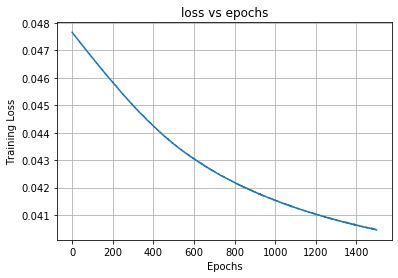

In [41]:
plt.plot(h['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.grid()
plt.title("loss vs epochs")
plt.show()

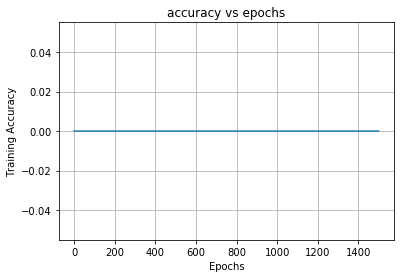

In [42]:
plt.plot(h['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.grid()
plt.title("accuracy vs epochs")
plt.show()

In [43]:
dfx = pd.read_csv("Test (house price)/Test_Data.csv")

In [44]:
print(dfx)

       Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1101          30       RL         60.0     8400   Pave   NaN      Reg   
1    1102          20       RL         61.0     9758   Pave   NaN      IR1   
2    1103          20       RL         70.0     7000   Pave   NaN      Reg   
3    1104          20       RL         79.0     8910   Pave   NaN      Reg   
4    1105         160       RM         24.0     2016   Pave   NaN      Reg   
..    ...         ...      ...          ...      ...    ...   ...      ...   
355  1456          60       RL         62.0     7917   Pave   NaN      Reg   
356  1457          20       RL         85.0    13175   Pave   NaN      Reg   
357  1458          70       RL         66.0     9042   Pave   NaN      Reg   
358  1459          20       RL         68.0     9717   Pave   NaN      Reg   
359  1460          20       RL         75.0     9937   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fen

In [45]:
drop_columns = ["MiscFeature","PoolQC","Fence","FireplaceQu","Alley"]
xtest = dfx.drop(columns = drop_columns)


In [46]:
xtest.dropna(inplace = True)

In [47]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 359
Data columns (total 75 columns):
Id               269 non-null int64
MSSubClass       269 non-null int64
MSZoning         269 non-null object
LotFrontage      269 non-null float64
LotArea          269 non-null int64
Street           269 non-null object
LotShape         269 non-null object
LandContour      269 non-null object
Utilities        269 non-null object
LotConfig        269 non-null object
LandSlope        269 non-null object
Neighborhood     269 non-null object
Condition1       269 non-null object
Condition2       269 non-null object
BldgType         269 non-null object
HouseStyle       269 non-null object
OverallQual      269 non-null int64
OverallCond      269 non-null int64
YearBuilt        269 non-null int64
YearRemodAdd     269 non-null int64
RoofStyle        269 non-null object
RoofMatl         269 non-null object
Exterior1st      269 non-null object
Exterior2nd      269 non-null object
MasVnrType   

In [48]:
data_types = xtest.dtypes
print(data_types)
data = np.array(data_types)
print(data)
print(data.shape)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 75, dtype: object
[dtype('int64') dtype('int64') dtype('O') dtype('float64') dtype('int64')
 dtype('O') dtype('O') dtype('O') dtype('O') dtype('O') dtype('O')
 dtype('O') dtype('O') dtype('O') dtype('O') dtype('O') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('O') dtype('O')
 dtype('O') dtype('O') dtype('O') dtype('float64') dtype('O') dtype('O')
 dtype('O') dtype('O') dtype('O') dtype('O') dtype('O') dtype('int64')
 dtype('O') dtype('int64') dtype('int64') dtype('int64') dtype('O')
 dtype('O') dtype('O') dtype('O') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64') dtype('O')
 dtype('in

In [49]:
columns = xtest.columns
print(columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [50]:
x_test = np.array(xtest)

In [51]:
for i in range(data.shape[0]):
    if data[i] == 'O':
        le = LabelEncoder()
        x_test[:,i] = le.fit_transform(x_test[:,i])
        #x_train[:,columns[i]] = ohe.transform(x_train[:,columns[i]])

In [52]:
minmax = MinMaxScaler()
x_test = minmax.fit_transform(x_test)

In [53]:
x_test

array([[0.        , 0.05882353, 0.75      , ..., 0.75      , 1.        ,
        0.75      ],
       [0.00278552, 0.        , 0.75      , ..., 0.25      , 1.        ,
        0.75      ],
       [0.00557103, 0.        , 0.75      , ..., 0.25      , 1.        ,
        0.5       ],
       ...,
       [0.99442897, 0.29411765, 0.75      , ..., 1.        , 1.        ,
        0.75      ],
       [0.99721448, 0.        , 0.75      , ..., 1.        , 1.        ,
        0.75      ],
       [1.        , 0.        , 0.75      , ..., 0.5       , 1.        ,
        0.75      ]])

In [59]:
pred = model2.predict(x_test)

In [60]:
pred

array([[0.00100641],
       [0.0017699 ],
       [0.00090615],
       [0.00041364],
       [0.00046818],
       [0.00160667],
       [0.00079053],
       [0.00081334],
       [0.00164397],
       [0.00082706],
       [0.00076588],
       [0.00119419],
       [0.00059752],
       [0.00084559],
       [0.00139099],
       [0.00014641],
       [0.00064643],
       [0.00104498],
       [0.00146846],
       [0.00071289],
       [0.00060012],
       [0.00041459],
       [0.00073149],
       [0.00048854],
       [0.00093252],
       [0.00032846],
       [0.00205108],
       [0.00073171],
       [0.00047235],
       [0.0027665 ],
       [0.00501273],
       [0.00532046],
       [0.00088147],
       [0.00147355],
       [0.00084127],
       [0.00126493],
       [0.00032385],
       [0.00129042],
       [0.00207342],
       [0.00870543],
       [0.00220017],
       [0.00051783],
       [0.0017197 ],
       [0.00109425],
       [0.00213357],
       [0.00230517],
       [0.00190039],
       [0.000

In [61]:
pred.shape

(269, 1)

In [57]:
'''for i in range(pred.shape[0]):
    pred[i] = float(pred[i]*np.sum(pred))'''

In [62]:
minmax = MinMaxScaler()
pred2 = minmax.fit_transform(pred)

In [ ]:
MinMaxScaler?

In [ ]:
pred2 = []
for i in range(pred.shape[0]):
    pred2.append(float((pred[i] - min(pred))/(max(pred)  - min(pred))))

In [63]:
m = max(pred)
n = min(pred)
print(m,n)

[0.10154178] [0.00014641]


In [64]:
pred2 = np.array(pred2)
for i in range(pred2.shape[0]):
    pred2[i] = pred2[i]*100000

In [65]:
pred2

array([[   848.17175],
       [  1601.1512 ],
       [   749.2841 ],
       [   263.5526 ],
       [   317.34848],
       [  1440.1675 ],
       [   635.2576 ],
       [   657.7542 ],
       [  1476.9545 ],
       [   671.287  ],
       [   610.9468 ],
       [  1033.3629 ],
       [   444.90582],
       [   689.56464],
       [  1227.4554 ],
       [     0.     ],
       [   493.1421 ],
       [   886.2078 ],
       [  1303.8545 ],
       [   558.68176],
       [   447.47144],
       [   264.4888 ],
       [   577.0257 ],
       [   337.42722],
       [   775.28906],
       [   179.55003],
       [  1878.465  ],
       [   577.2443 ],
       [   321.45773],
       [  2584.0322 ],
       [  4799.352  ],
       [  5102.847  ],
       [   724.9432 ],
       [  1308.8799 ],
       [   685.2976 ],
       [  1103.1278 ],
       [   174.99947],
       [  1128.2678 ],
       [  1900.4971 ],
       [  8441.234  ],
       [  2025.5037 ],
       [   366.31372],
       [  1551.6365 ],
       [   

In [66]:
len(pred2)

269

In [67]:
y_pred = pd.DataFrame(pred2,columns=['SalePrice'])
y_pred.to_csv("House Price Prediction3.csv",index = True)